,Admit,Gender,Dept,Freq
0,Admitted,Male,A,512
1,Rejected,Male,A,313
2,Admitted,Female,A,89
3,Rejected,Female,A,19
4,Admitted,Male,B,353
5,Rejected,Male,B,207
6,Admitted,Female,B,17
7,Rejected,Female,B,8
8,Admitted,Male,C,120
9,Rejected,Male,C,205


Observed Frequencies of Admittance by Gender, ignoring department:



,admitted,rejected,row_total
Male,1198,1493,2691
Female,557,1278,1835
column_total,1755,2771,4526



Manually calculated Chi-Squared statistic =  92.2053
P-value =  0.0

scipy.stats Chi-Sqaured statistic: 92.20528041152764
P-value = 7.813600388994667e-22

The observed frequencies are unlikely to have occurred under the null hypothesis (p <= 0.05). Admittance/rejection is significantly related to gender (when ignoring which department was applied to).

Cramer's V = 0.142731760206081


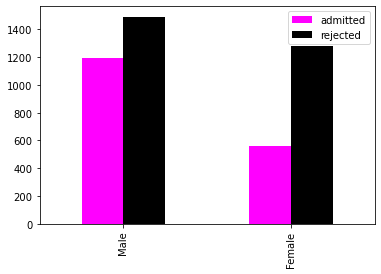

In [1]:
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np

# data on UCBA admissions obtained from 'https://forge.scilab.org/index.php/p/rdataset/source/tree/master/csv/datasets/UCBAdmissions.csv'
# see also: https://cran.r-project.org/web/packages/eikosograms/vignettes/DataAnalysis.html

# importing and subsetting the data

dframe = pd.read_csv('UCBAdmissions.csv')
dframe = dframe.drop(columns = 'Unnamed: 0')

display(dframe)

male = dframe[dframe.Gender == 'Male'].copy()

female = dframe[dframe.Gender == 'Female'].copy()

female_acc = female[female.Admit == 'Admitted'].copy()

male_acc = male[male.Admit == 'Admitted'].copy()

female_rej = female[female.Admit == 'Rejected'].copy()

male_rej = male[male.Admit == 'Rejected'].copy()

male_admit_counts = [sum(male_acc['Freq']), sum(male_rej['Freq'])]

female_admit_counts = [sum(female_acc['Freq']), sum(female_rej['Freq'])]

# creating a dataframe of the observed frequencies of admittance by gender, ignoring department

df = pd.DataFrame([male_admit_counts, female_admit_counts], columns = ['admitted', 'rejected'])
df.index = ['Male', 'Female']
df.loc['column_total']= df.sum(numeric_only=True, axis=0)
df.loc[:,'row_total'] = df.sum(numeric_only=True, axis=1)

print('Observed Frequencies of Admittance by Gender, ignoring department:')
print()
display(df)
print()

# calculating the expected frequencies

grand = df.row_total[2]

male_exp = [(df.admitted[2]*df.row_total[0])/grand, (df.rejected[2]*df.row_total[0])/grand]

female_exp = [(df.admitted[2]*df.row_total[1])/grand, (df.rejected[2]*df.row_total[1])/grand]

exp = pd.DataFrame([male_exp, female_exp], columns = ['admitted', 'rejected'])
exp.index = ['Male', 'Female']

# calculating the chi-squared statistic and p-vlaue
deg_free = (df.shape[0]-2) * (df.shape[1]-2)
chi_square = (df.admitted[0]-exp.admitted[0])**2/exp.admitted[0] + (df.rejected[0]-exp.rejected[0])**2/exp.rejected[0] + (df.admitted[1]-exp.admitted[1])**2/exp.admitted[1] + (df.rejected[1]-exp.rejected[1])**2/exp.rejected[1]
p_value = 1 - scipy.stats.chi2.cdf(chi_square, deg_free)
print('Manually calculated Chi-Squared statistic = ', round(chi_square,4))
print('P-value = ', p_value)

# checking results with scipy.stats

df2 = df.drop(index = 'column_total', columns = 'row_total')

result = scipy.stats.power_divergence(df2, exp, axis = None, ddof = 2)

print()
print('scipy.stats Chi-Sqaured statistic:', result[0])
print('P-value =', result[1])
print()

if result[1] <= 0.05:
    print('The observed frequencies are unlikely to have occurred under the null hypothesis (p <= 0.05). Admittance/rejection is significantly related to gender (when ignoring which department was applied to).')
    
else:
    print('The observed frequencies are likely to have occurred under the null hypothesis (p > 0.05). Admittance/rejection is NOT significantly related to gender (when ignoring which department was applied to).')
    
# plotting the data

df2.plot.bar(color= ['magenta', 'black'])

# calculating effect size

deg_free_star = np.min([df2.shape[0]-1, df2.shape[1]-1])
n = df.at['column_total', 'row_total']
cramers_v = np.sqrt(chi_square/(n*deg_free_star))
print()

print("Cramer's V =", cramers_v)

Department A odds ratio =  0.35
Department B odds ratio =  0.8
Department C odds ratio =  1.13
Department D odds ratio =  0.92
Department E odds ratio =  1.22
Department F odds ratio =  0.83


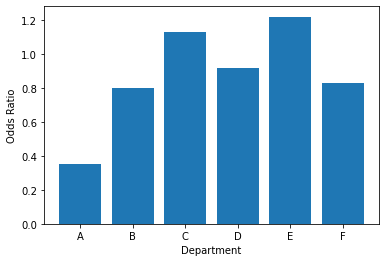


An odds ratio of 1 is no difference in the odds of acceptance for males or females.
An odds ratio greater than 1 favours male applicants e.g. they have higher odds of being accepted.
An odds ratio less than 1 favours female applicants e.g. they have higher odds of being accepted.


In [2]:
# subsetting the data by department
dept_a = dframe[dframe['Dept'] == 'A'].copy()
dept_b = dframe[dframe['Dept'] == 'B'].copy()
dept_c = dframe[dframe['Dept'] == 'C'].copy()
dept_d = dframe[dframe['Dept'] == 'D'].copy()
dept_e = dframe[dframe['Dept'] == 'E'].copy()
dept_f = dframe[dframe['Dept'] == 'F'].copy()

# creating a list of the departmental data and a list of the alphabetical labels for each department
depts = [dept_a, dept_b, dept_c, dept_d, dept_e, dept_f]
labels = ['A', 'B','C', 'D', 'E','F']

# writing a function to calculate the odds ratio for each department
# (odds of admittance given male)/(odds of admittance given female)
def dept_odds_ratios(dept):
    odds_ratio = (dept['Freq'].iloc[0]/dept['Freq'].iloc[1])/(dept['Freq'].iloc[2]/dept['Freq'].iloc[3])
    return odds_ratio

# printing the odds ratio for each department
odds_ratios = np.zeros(len(labels))
for i in np.arange(len(depts)):
    print('Department',labels[i], 'odds ratio = ', np.round(dept_odds_ratios(depts[i]),2))
    odds_ratios[i] = np.round(dept_odds_ratios(depts[i]),2)     

# creating a barplot of the odds ratios
plt.figure()
plt.bar(labels, odds_ratios)
plt.ylabel('Odds Ratio')
plt.xlabel('Department')
plt.show()

print('\nAn odds ratio of 1 is no difference in the odds of acceptance for males or females.')
print('An odds ratio greater than 1 favours male applicants e.g. they have higher odds of being accepted.')
print('An odds ratio less than 1 favours female applicants e.g. they have higher odds of being accepted.') 

In [3]:
# preparing the data for a logistic regression, predicting acceptance/rejection as a function of department and 
# applicant gender

import statsmodels.api as sm

# creating dummy variables for the categorical predictors and outcome
dummy_df = pd.get_dummies(dframe,drop_first= True)
display(dummy_df)

,Freq,Admit_Rejected,Gender_Male,Dept_B,Dept_C,Dept_D,Dept_E,Dept_F
0,512,0,1,0,0,0,0,0
1,313,1,1,0,0,0,0,0
2,89,0,0,0,0,0,0,0
3,19,1,0,0,0,0,0,0
4,353,0,1,1,0,0,0,0
5,207,1,1,1,0,0,0,0
6,17,0,0,1,0,0,0,0
7,8,1,0,1,0,0,0,0
8,120,0,1,0,1,0,0,0
9,205,1,1,0,1,0,0,0


In [4]:
# converting the data to individual level data (one row per individual) 
# currently the information in the frequency column shows how many individuals had the pattern of scores on the other
# variables in the columns to the right of 'Freq'.
# To get the individual level data, a dataframe is created where there is one row for each individual e.g. there are
# 512 rows in the new dataframe which are a copy of the first row in the aggregated dataframe

individual_df = pd.DataFrame()

for i in np.arange(len(dummy_df)):
    # get the frequency for each configuration of scores on the admit/reject, department and gender variables
    repeat = dummy_df['Freq'].iloc[i]
    # add the row the correct number of times to the new dataframe, omitting the 'Freq' column
    for rep in np.arange(repeat): 
        ind_level_data = dummy_df.iloc[i,1:]
        individual_df = individual_df.append(ind_level_data, ignore_index = True)

individual_df = individual_df.astype('int')
display(individual_df)
print('\nFor the "Admit_Rejected" column, 0 = Admitted, 1 = Rejected.')
print('For the "Gender_Male" column, 0 = Female, 1 = Male.\n')

# distinguish the predictors from the outcome
not_outcome = individual_df.columns[individual_df.columns != 'Admit_Rejected']
outcome = individual_df['Admit_Rejected']
predictors = individual_df[not_outcome]
predictors = sm.add_constant(predictors)

# fit a logistic regression model (admit/reject ~ department + gender)
mod = sm.Logit(outcome, predictors).fit()

display(mod.summary())

# calculate the proportion of predictions the model gets correct
predicted_probs = mod.predict(predictors)

predicted_classes = (predicted_probs >= 0.5).astype(int) # convert the predictions from probabilities to classes

correct_predictions = sum(predicted_classes == outcome)/len(outcome)

print('The model got the correct classifications', correct_predictions*100, '% correct.')

,Admit_Rejected,Dept_B,Dept_C,Dept_D,Dept_E,Dept_F,Gender_Male
0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
4521,1,0,0,0,0,1,0
4522,1,0,0,0,0,1,0
4523,1,0,0,0,0,1,0
4524,1,0,0,0,0,1,0



For the "Admit_Rejected" column, 0 = Admitted, 1 = Rejected.
For the "Gender_Male" column, 0 = Female, 1 = Male.

Optimization terminated successfully.
         Current function value: 0.573077
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         Admit_Rejected   No. Observations:                 4526
Model:                          Logit   Df Residuals:                     4519
Method:                           MLE   Df Model:                            6
Date:                Thu, 21 Jan 2021   Pseudo R-squ.:                  0.1418
Time:                        14:38:04   Log-Likelihood:                -2593.7
converged:                       True   LL-Null:                       -3022.2
Covariance Type:            nonrobust   LLR p-value:                7.974e-182
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.6819      0.099     -6.880      0.000      -0.876      -0.488
Dept_B          0.0434      0.110      0.395      0.693      -0.172       0.259
Dept_C          1.2626      0.107     11.841      0.000       1.054       1.472
Dept_D          1.2946      0.106     12.234      0.000       1.087       1.502
Dept_E          1.7393      0.126     13.792      0.000       1.492       1.986
Dept_F          3.3065      0.170     19.452      0.000       2.973       3.640
Gender_Male     0.0999      0.081      1.235      0.217      -0.059       0.258
===============================================================================
"""

The model got the correct classifications 70.5921343349536 % correct.


The p-value for the effect of gender is 0.217. This indicates that gender is not a significant predictor of the odds of rejection when we control for which department is applied to.

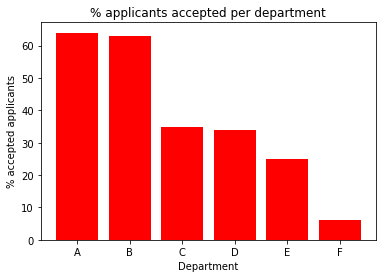

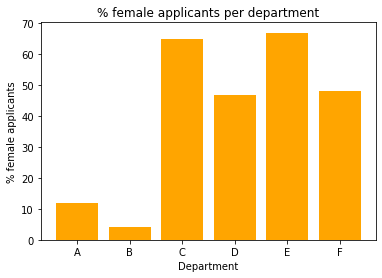

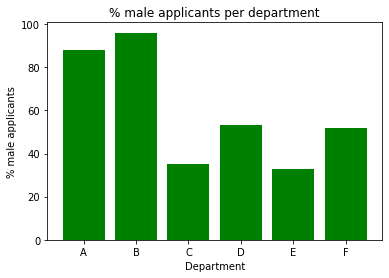

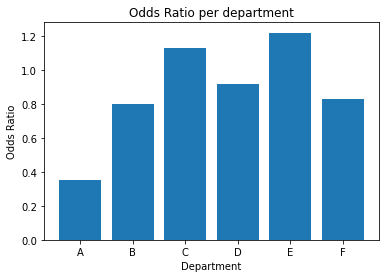

An odds ratio of 1 is no difference in the odds of acceptance for males or females.
An odds ratio greater than 1 favours male applicants e.g. they have higher odds of being accepted.
An odds ratio less than 1 favours female applicants e.g. they have higher odds of being accepted.


In [5]:
# writing a function to calculate the proportion of applicants accepted in each deparment

def dept_accept_prop(dept):
    total_applicants = np.sum(dept['Freq'])
    total_accepted = np.sum(dept['Freq'].iloc[0] + dept['Freq'].iloc[2])
    acceptance_prop = total_accepted/total_applicants
    return acceptance_prop

# printing the proportion of accepted applicants per department
accept_props_by_dept = np.zeros(len(labels))
for i in np.arange(len(depts)):
    accept_props_by_dept[i] = np.round(dept_accept_prop(depts[i]),2)     

# creating a barplot of the proportion of total applicants accepted per department
plt.figure()
plt.title('% applicants accepted per department')
plt.bar(labels, accept_props_by_dept*100, color = 'red')
plt.ylabel('% accepted applicants')
plt.xlabel('Department')
plt.show()

# writing a function to calculate the proportion of female applicants to each deparment
def prop_female(dept):
    total_applicants = np.sum(dept['Freq'])
    total_female = np.sum(dept['Freq'].iloc[2] + dept['Freq'].iloc[3])
    female_prop = total_female/total_applicants
    return female_prop

# printing the proportion of female applicants to each deparment
female_props_by_dept = np.zeros(len(labels))
for i in np.arange(len(depts)):
    female_props_by_dept[i] = np.round(prop_female(depts[i]),2)     

# creating a barplot of the the proportion of female applicants to each deparment
plt.figure()
plt.title('% female applicants per department')
plt.bar(labels, female_props_by_dept*100, color = 'orange')
plt.ylabel('% female applicants')
plt.xlabel('Department')
plt.show()

# writing a function to calculate the proportion of male applicants to each deparment
def prop_male(dept):
    total_applicants = np.sum(dept['Freq'])
    total_male = np.sum(dept['Freq'].iloc[0] + dept['Freq'].iloc[1])
    male_prop = total_male/total_applicants
    return male_prop

# printing the proportion of male applicants to each deparment
male_props_by_dept = np.zeros(len(labels))
for i in np.arange(len(depts)):
    male_props_by_dept[i] = np.round(prop_male(depts[i]),2)     

# creating a barplot of the the proportion of male applicants to each deparment
plt.figure()
plt.bar(labels, male_props_by_dept*100, color = 'green')
plt.title('% male applicants per department')
plt.ylabel('% male applicants')
plt.xlabel('Department')
plt.show()

# plotting (again) the odds ratios
plt.figure()
plt.title('Odds Ratio per department')
plt.bar(labels, odds_ratios)
plt.ylabel('Odds Ratio')
plt.xlabel('Department')
plt.show()

print('An odds ratio of 1 is no difference in the odds of acceptance for males or females.')
print('An odds ratio greater than 1 favours male applicants e.g. they have higher odds of being accepted.')
print('An odds ratio less than 1 favours female applicants e.g. they have higher odds of being accepted.') 

What explaines these results?

"When all three variates are considered together, the true story emerges [...] In all departments but C and E (which are near equal), a greater proportion of female applicants were accepted than males. This is a famous example of Simpson’s paradox. [...] [T]he reason for the apparent favouritism towards male applicants occured only because a great many more males than females applied to those departments with the highest admission rates. And in those departments (A and B) the admission rates for females was much higher than that for males!"

from https://cran.r-project.org/web/packages/eikosograms/vignettes/DataAnalysis.html